In [189]:
# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew 
import datetime as dt
from datetime import datetime
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#MachineLearning
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [190]:
df = pd.read_excel('ds_final.xlsx')

In [191]:
df.head()

,Unnamed: 0,HORA,Egreso,Ingreso,fecha_habil,Cantidad,domingo,jueves,lunes,martes,miercoles,sabado,viernes,Flores,Palermo,Retiro
0,0,2020-08-01 00:00:00,1,0,0,28,0,0,0,0,0,1,0,0,1,0
1,1,2020-08-01 00:00:00,0,1,0,655,0,0,0,0,0,1,0,1,0,0
2,2,2020-08-01 00:00:00,1,0,0,706,0,0,0,0,0,1,0,1,0,0
3,3,2020-08-01 00:00:00,0,1,0,352,0,0,0,0,0,1,0,0,0,1
4,4,2020-08-01 00:00:00,1,0,0,358,0,0,0,0,0,1,0,0,0,1


In [192]:
df.drop(columns='Unnamed: 0', inplace=True) # Quito la columna indice que tenía el excel

In [193]:
df['HORA'] = df['HORA'].astype('str') # Paso HORA a texto para poder separar facilmente
df['Año'] = df.HORA.str.slice(0,4).astype('str')  #Al parecer Regresion no funciona bien con fecha tipo datetime, asiq se pasa todo a número
df['Mes'] = df.HORA.str.slice(5,7).astype('int') 
df['Día'] = df.HORA.str.slice(8,10).astype('int') 
df['Hora'] = df.HORA.str.slice(11,13).astype('int') 

In [194]:
df.dtypes

HORA           object
Egreso          int64
Ingreso         int64
fecha_habil     int64
Cantidad        int64
domingo         int64
jueves          int64
lunes           int64
martes          int64
miercoles       int64
sabado          int64
viernes         int64
Flores          int64
Palermo         int64
Retiro          int64
Año            object
Mes             int32
Día             int32
Hora            int32
dtype: object

In [195]:
# Luego de correr los dummies, vemos que hay muchas columnas de nombre repetido (se junta el mes 12, con la hora 12, con el día 12 x ejem))
# Por ende, antes de correr dummies, tenemos que nombrar cada hora, dia y mes, para evitar confusiones
# Vamos a proceder de la misma forma que hicimos con los dias de la semana en el EDA: creamos las lista con nombres, luego reemplazamos en el dataset

In [196]:
# Primero creamos listas ordenas, nos ayudamos de un loop "for" para no hacerlo a mano
horas = []
dias_mes = []
meses = []
n_horas = []
n_dias_mes = []
n_meses = []

In [197]:
for i in range(31):
  if i < 12:
    horas.append(f'{i}am')
    dias_mes.append(f'dia_{i+1}')
    meses.append(f'mes_{i+1}')
    n_horas.append(i)
    n_dias_mes.append(i+1)
    n_meses.append(i+1)
  elif i < 24:
    horas.append(f'{i}pm')
    dias_mes.append(f'dia_{i+1}')
    n_horas.append(i)
    n_dias_mes.append(i+1)
  else:
    dias_mes.append(f'dia_{i+1}')
    n_dias_mes.append(i+1)

In [198]:
print(n_dias_mes,n_horas, n_meses) # Chequeamos valores nuemericos

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [199]:
print(horas, dias_mes, meses) # Chequeamos listas (futuras features)

['0am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '13pm', '14pm', '15pm', '16pm', '17pm', '18pm', '19pm', '20pm', '21pm', '22pm', '23pm'] ['dia_1', 'dia_2', 'dia_3', 'dia_4', 'dia_5', 'dia_6', 'dia_7', 'dia_8', 'dia_9', 'dia_10', 'dia_11', 'dia_12', 'dia_13', 'dia_14', 'dia_15', 'dia_16', 'dia_17', 'dia_18', 'dia_19', 'dia_20', 'dia_21', 'dia_22', 'dia_23', 'dia_24', 'dia_25', 'dia_26', 'dia_27', 'dia_28', 'dia_29', 'dia_30', 'dia_31'] ['mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12']


In [200]:
# Viendo que esta todo ok, pasamos a reemplazar valores numericos a nombres

In [201]:
df.sort_values(by=['Año', 'Mes', 'Día', 'Hora'], inplace=True)

In [202]:
df['Hora'].replace(n_horas, horas, inplace=True)
df['Día'].replace(n_dias_mes, dias_mes, inplace=True)
df['Mes'].replace(n_meses, meses, inplace=True)

In [203]:
df.head() #chv

,HORA,Egreso,Ingreso,fecha_habil,Cantidad,domingo,jueves,lunes,martes,miercoles,sabado,viernes,Flores,Palermo,Retiro,Año,Mes,Día,Hora
0,2020-08-01 00:00:00,1,0,0,28,0,0,0,0,0,1,0,0,1,0,2020,mes_8,dia_1,0am
1,2020-08-01 00:00:00,0,1,0,655,0,0,0,0,0,1,0,1,0,0,2020,mes_8,dia_1,0am
2,2020-08-01 00:00:00,1,0,0,706,0,0,0,0,0,1,0,1,0,0,2020,mes_8,dia_1,0am
3,2020-08-01 00:00:00,0,1,0,352,0,0,0,0,0,1,0,0,0,1,2020,mes_8,dia_1,0am
4,2020-08-01 00:00:00,1,0,0,358,0,0,0,0,0,1,0,0,0,1,2020,mes_8,dia_1,0am


In [204]:
#  Luego de probar con el tipo de datos, logramos hacer los reemplazos de forma correcta, y ya estamos listo para "dummizar"

In [205]:
d_año = pd.get_dummies(df['Año']) # Para mejor el modelo conviene pasar todo a dummie cuando tratamos con tiempo
df = pd.concat([df,d_año],axis = 1) #Se probó dejando la fecha pero no funcionaba y teniamos que pasarlo a un valor nuemrico tipo timestamp

In [206]:
d_mes = pd.get_dummies(df['Mes'])
df = pd.concat([df,d_mes],axis = 1)

In [207]:
d_dia = pd.get_dummies(df['Día'])
df = pd.concat([df,d_dia],axis = 1)

In [208]:
d_hora = pd.get_dummies(df['Hora'])
df = pd.concat([df,d_hora],axis = 1)

In [209]:
df.drop(columns={'HORA', 'Hora', 'Día', 'Mes', 'Año'}, inplace=True)

In [210]:
np.shape(df)

(52508, 83)

In [211]:
df.head(10)

,Egreso,Ingreso,fecha_habil,Cantidad,domingo,jueves,lunes,martes,miercoles,sabado,...,22pm,23pm,2am,3am,4am,5am,6am,7am,8am,9am
0,1,0,0,28,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,655,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,706,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,352,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,358,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,29,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,439,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,422,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,287,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,290,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


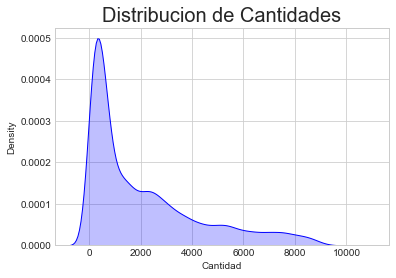

In [212]:
sns.kdeplot(df.Cantidad, color="b", shade = True)
plt.xlabel("Cantidad")
plt.title('Distribucion de Cantidades',size = 20)
plt.show()

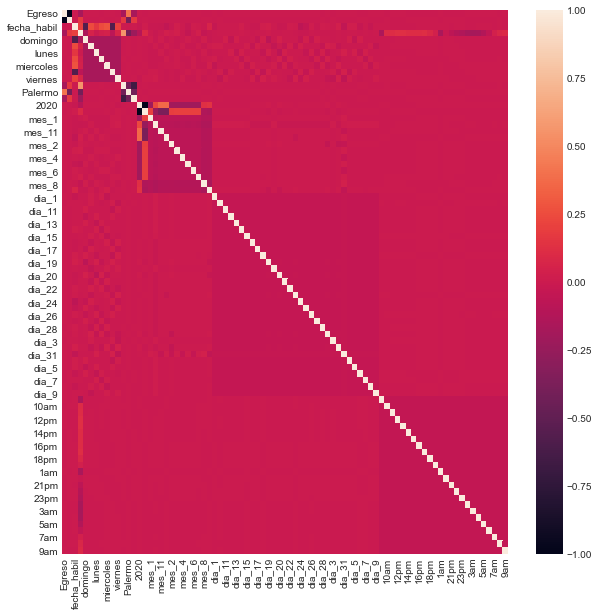

In [213]:
plt.figure(figsize=(10,10))
g = sns.heatmap(df.corr(),annot=False)  # corre en 31 seg, demasiada info, probamos desactivar valores y corre en 3 seg, peor aun así no es muy util

<AxesSubplot:>

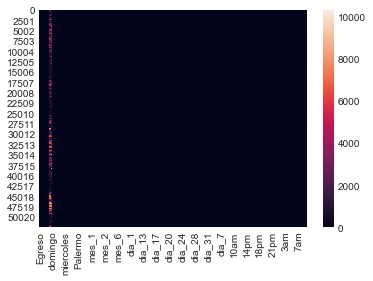

In [214]:
sns.heatmap(df)

In [215]:
# Como era de esperar, Cantidad esta en una escala muy superior al resto de las features (entre 0 y 1)
# Para escalara podríamos usar MaxMin, pero como queremos minimizar la influencia de los valores anómalos que vimos en el EDA, usaremos StandarScaler

In [216]:
x = df
y = df.Cantidad
x.drop(columns='Cantidad', inplace=True)

In [217]:
#  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Punto de quiebre >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [218]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state = 33) #En principio se jugó sin rnd state, pero luego los resultados fueron variando, x lo que se decidió usar para tener "reproducibilidad"

In [219]:
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

<AxesSubplot:>

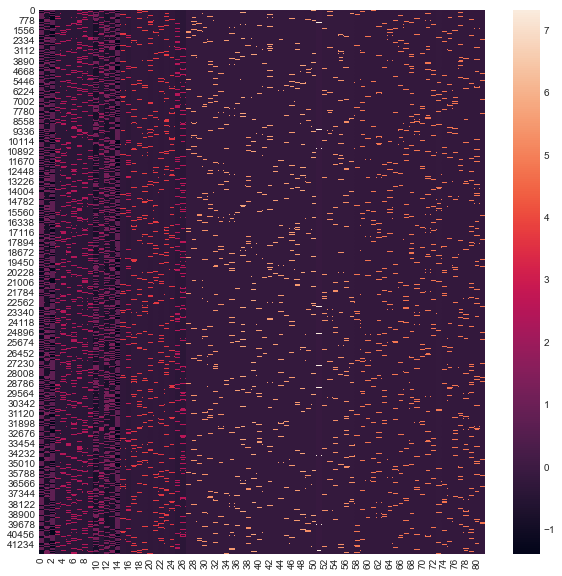

In [220]:
plt.figure(figsize=(10,10))
sns.heatmap(xtrain_scal)

# K-Nearest Neighbor (KNN)

In [243]:
#KNN Regressor(weights = 'distance')

In [229]:
 knn = KNeighborsRegressor(weights = "distance") 
 parameters_k = np.arange(10,31,4)
 parameters_knn = [{'n_neighbors': parameters_k}]
 regressor_knn = GridSearchCV(knn, parameters_knn, refit = True, cv=5, verbose=True)

In [230]:
 regressor_knn.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 33.2min finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'),
             param_grid=[{'n_neighbors': array([10, 14, 18, 22, 26, 30])}],
             verbose=True)

In [231]:
 best_param_1 = regressor_knn.best_params_

In [232]:
 r2_1 = regressor_knn.best_score_

In [244]:
 ypred = regressor_knn.predict(xtest_scal)
 RMSE_1 = mean_squared_error(ytest, ypred, squared=False)#Squared: con True calcula MSE, con False el RMSE.
RMSE_1

1258.159768082789

In [234]:
 print(best_param_1)

{'n_neighbors': 22}


In [236]:
# KNN Regressor (weights = "uniform")

In [237]:
#  Probamos el mismo setup, modificando los pesos, para que sean proporcionales a la distancia, ya que, en teoría, el scaler nos minimiza la influencia de los outliers

In [238]:
knn_2 = KNeighborsRegressor(weights = "uniform")
parameters_k_2 = np.arange(19,22,1)
parameters_knn_2 = [{'n_neighbors': parameters_k_2}]
regressor_knn_2 = GridSearchCV(knn_2, parameters_knn_2, refit = True, cv=5, verbose=True)

In [239]:
regressor_knn_2.fit(xtrain_scal, ytrain) # parametros_u (10,31,4) corrió tmb en 3 min 9 seg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 10.8min finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([19, 20, 21])}], verbose=True)

In [240]:
best_param_2 = regressor_knn_2.best_params_

In [241]:
r2_2 = regressor_knn_2.best_score_

In [245]:
ypred2 = regressor_knn_2.predict(xtest_scal)
RMSE_2 = mean_squared_error(ytest, ypred2, squared=False)#Squared: con True calcula MSE, con False el RMSE.
print("En KNN el RSME es: "+ str(RMSE_2))

En KNN el RSME es: 1212.760649315786


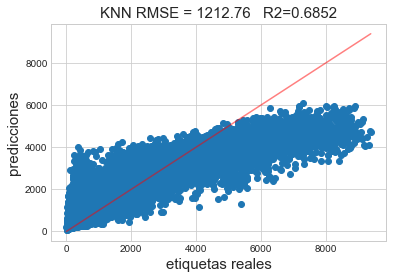

In [246]:
plt.scatter(ytest, ypred2)
plt.plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
plt.title('KNN RMSE = '+str(np.round(RMSE_2,2)) +'   R2='+str(np.round(r2_2,4)), size=15)
plt.xlabel('etiquetas reales', size=15)
plt.ylabel('predicciones', size=15)
plt.savefig('KNN.png', dpi=300, bbox_inches='tight') #para exportar la imagen
plt.show()

# Redes Neuronales

In [111]:
import tensorflow as tf #TensorFlow necesita ser instalado para usarse
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers

In [112]:
l2_reg = 0.01 #regularizador
lrate = 0.001 #learning rate = 1%
epochs = 25
bachs = 5 #batch (lote)

In [113]:
################### Optimizer ###################
optim = tf.keras.optimizers.Adam(learning_rate= lrate)
################### MODEL ARCHITECTURE ###############
# 00) INPUT
inputdim = Input(shape=(xtrain_scal.shape[1],))
# 01) DENSE LAYER
hl_1 = Dense(5, kernel_regularizer=regularizers.l2(l2_reg), activation = 'relu')(inputdim) #se utiliza una función RELU en la primera capa
# 03) DENSE LAYER
hl_2 = Dense(2, activation = 'linear')(hl_1) #función LINEAR en la segunda capa
reg_layer = Dense(1)(hl_2)
# 06) AUTOENCODER
nn_regressor = Model(inputdim, reg_layer)
nn_regressor.summary()
nn_regressor.compile(optimizer= optim, loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 82)]              0         
                                                                 
 dense_3 (Dense)             (None, 5)                 415       
                                                                 
 dense_4 (Dense)             (None, 2)                 12        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 430
Trainable params: 430
Non-trainable params: 0
_________________________________________________________________


In [114]:
#se entrena y visualiza cómo se modifican las variables en función de los epochs
nn_regressor.fit(xtrain_scal, ytrain,epochs=epochs, batch_size=bachs,  shuffle=True,  validation_data=(xtest_scal, ytest))

Epoch 1/25
8402/8402 [==============================] - 16s 2ms/step - loss: 3139033.0000 - rmse: 1771.7300 - val_loss: 670116.8125 - val_rmse: 818.6013
Epoch 2/25
8402/8402 [==============================] - 15s 2ms/step - loss: 637857.5625 - rmse: 798.6543 - val_loss: 591073.4375 - val_rmse: 768.8067
Epoch 3/25
8402/8402 [==============================] - 16s 2ms/step - loss: 575133.7500 - rmse: 758.3697 - val_loss: 536795.5000 - val_rmse: 732.6561
Epoch 4/25
8402/8402 [==============================] - 15s 2ms/step - loss: 518369.5000 - rmse: 719.9719 - val_loss: 486106.0312 - val_rmse: 697.2059
Epoch 5/25
8402/8402 [==============================] - 16s 2ms/step - loss: 475776.3438 - rmse: 689.7578 - val_loss: 447969.5312 - val_rmse: 669.2983
Epoch 6/25
8402/8402 [==============================] - 15s 2ms/step - loss: 438953.2188 - rmse: 662.5280 - val_loss: 409548.9688 - val_rmse: 639.9514
Epoch 7/25
8402/8402 [==============================] - 16s 2ms/step - loss: 394976.7500 - r

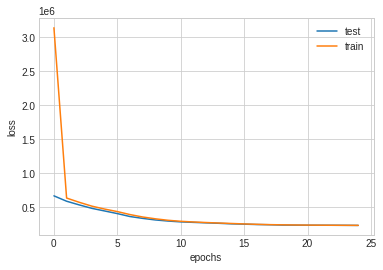

In [115]:
#se grafica la pérdida en función de los epochs
#se nota un descenso de la pérdida a medida que aumentan los epochs
plt.plot(nn_regressor.history.history['val_loss'], label = 'test')
plt.plot(nn_regressor.history.history['loss'], label = 'train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [120]:
import sklearn

ypred_nn = nn_regressor.predict(xtest_scal)
r2_nn = sklearn.metrics.r2_score(ypred_nn, ytest)
rmse_nn = tf.keras.metrics.RootMeanSquaredError()
rmse_nn.update_state([ypred_nn], [ytest])
rmse_nn = float(rmse_nn.result().numpy())
#MSE ( 485.59 (se visualiza en el siguiente gráfico)

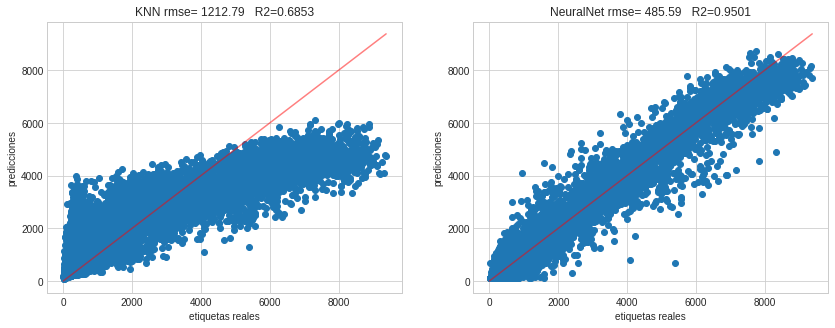

In [121]:
fig, ax = plt.subplots(1,2, figsize = (14,5))
ax[0].scatter(ytest, ypred2)
ax[0].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[0].set_title('KNN rmse= '+ str(np.round(MSE_2,2)) +'   R2='+str(np.round(r2_2,4)))
ax[0].set_xlabel('etiquetas reales')
ax[0].set_ylabel('predicciones')
ax[1].scatter(ytest, ypred_nn)
ax[1].plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax[1].set_title('NeuralNet rmse= '+ str(np.round(rmse_nn,2)) +'   R2='+ str(np.round(r2_nn,4)))
ax[1].set_xlabel('etiquetas reales')
ax[1].set_ylabel('predicciones')
plt.show()

# Random Forest

In [51]:
#3er modelo: Random Forest
from sklearn.ensemble import RandomForestRegressor

In [52]:
import numpy as np

from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

if __name__ == '__main__':

    # Set the parameters by cross-validation
    tuned_parameters = {'n_estimators': [100, 200, 300], 'max_depth': [4, 5, 6, 7], 'min_samples_split': [2, 3, 4]}

    # clf = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=1, verbose=1)
    clf = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=-1, verbose=1)
    clf.fit(xtrain, ytrain)
    print (clf.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 17.8min finished


RandomForestRegressor(max_depth=7, n_estimators=200)


In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
regr = RandomForestRegressor(n_estimators=200, max_features="sqrt", max_depth=7, random_state=42) 
#se realizan hasta 7 capas con lotes de 200

In [55]:
regr.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=200,
                      random_state=42)

In [56]:
ytrainpred=regr.predict(xtrain)
ytestpred=regr.predict(xtest)

In [61]:
rmsetrain = mean_squared_error(ytrain, ytrainpred, squared=False)
print("Raiz del error cuadrático medio (RMSE) en train: "+ str(rmsetrain))
rmsetest = mean_squared_error(ytest, ytestpred, squared=False)
print("Raiz del error cuadrático medio (RMSE) en test: "+ str(rmsetest))
r2test = r2_score(ytest, ytestpred)
print("El R2 score es: "+ str(r2test))

Raiz del error cuadrático medio (RMSE) en train: 1413.463518501798
Raiz del error cuadrático medio (RMSE) en test: 1423.7291448779536
El R2 score es: 0.5876222218214533


Text(0, 0.5, 'predicciones')

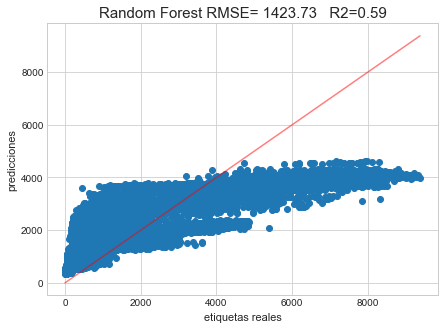

In [68]:
fig, ax = plt.subplots(1,1, figsize = (7,5))
ax.scatter(ytest, ytestpred)
ax.plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'r', alpha = 0.5)
ax.set_title('Random Forest RMSE= '+ str(np.round(rmsetest,2))+'   R2='+str(np.round(r2test,2)), size=15)
ax.set_xlabel('etiquetas reales', size=11)
ax.set_ylabel('predicciones', size=11)